In [1]:
from PyDSTool import *
from PyDSTool.Toolbox import phaseplane as pp
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [2]:
dir = './figures/'
plt.rc('text', usetex=True)

# Saddle-node bifurcation after transforming one parameters into a variable

## One-dimensional case

### Example 1:
$$f(x,a;b)=-a-b-x^2$$

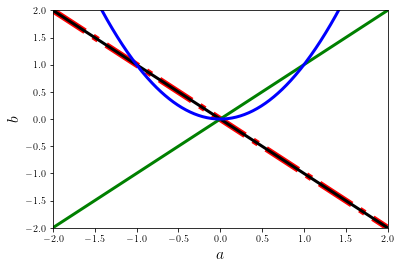

In [3]:
aa = np.arange(-2, 2, 0.01)
plt.plot(aa, -aa, lw=6, ls='-.', color='r')
plt.plot(aa, -aa, lw=3, ls='-', color='k')
plt.plot(aa, aa, lw=3, ls='-', color='g')
plt.plot(aa, aa**2, lw=3, ls='-', color='b')
plt.xlabel('$a$', fontsize=16)
plt.ylabel('$b$', fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.savefig(dir + 'Example1TwoParsBif.pdf', bbox_inches='tight')
plt.show()

**Second case**
$$x'=f(x,a;b)=-a-b-x^2\\
a'=g(a;b)=a-b$$

In [4]:
xstr = '-a-b-x**2'
astr = '-a+b'
params = {'b': -1}
ics = {'x': sqrt(2), 'a': -1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-2, 2]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [5]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
a  =  -2.000000009666895
x  =  2.0000000048334474
b  =  -2.000000009666895


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  -4.733346450651085e-17
x  =  -9.72969316129865e-09
b  =  -4.733346450651085e-17

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 0.9999999999999999

Neutral saddle found!

B Point found 
0 : 
a  =  -2.000000012754614
x  =  -2.0000000063773067
b  =  -2.000000012754614



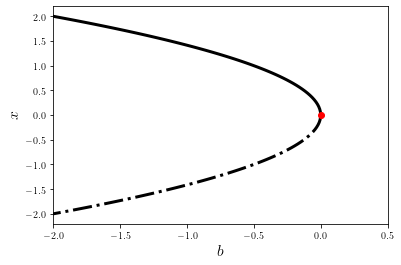

In [6]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 0.5))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example1Case2.pdf', bbox_inches='tight')
plt.show()

**Third case**
$$x'=f(x,a;b)=-a-b-x^2\\
a'=g(a;b)=a^2-b$$

In [7]:
xstr = '-a-b-x**2'
astr = 'a**2-b'
params = {'b': 1/4}
ics = {'x': -1/2, 'a': -1/2}
DSargs = args(name='EX13')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-2, 2]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [8]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 60
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  -0.9999999999999997
x  =  1.6693382947826833e-08
b  =  0.9999999999999994

Eigenvalues = 

     (-0.000000,0.000000)
     (-2.000000,0.000000)


a = 1.0

Maximum test function iterations reached.


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000038
  |transpose(A)p| = 0.004355

LP Point found 
0 : 
a  =  -1.8800075439735157e-05
x  =  0.004335864619300125
b  =  3.534428365397331e-10

Eigenvalues = 

     (-0.008672,0.000000)
     (-0.000038,0.000000)


a = 0.008633807276387092



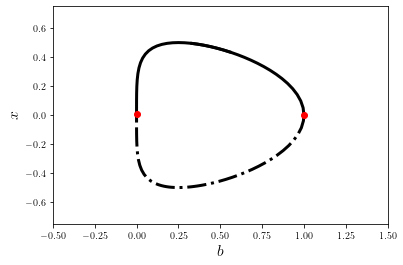

In [9]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-0.5, 1.5))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-0.75, 0.75))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example1Case3.pdf', bbox_inches='tight')
plt.show()

### Example 2
$$f(x,a;b)=b^2+1-a-x^2$$

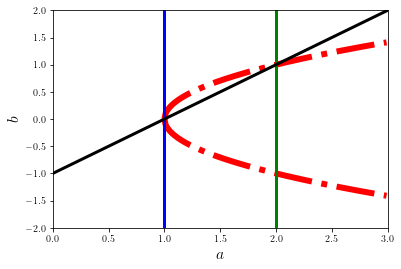

In [10]:
aa = np.arange(1, 3, 0.01)
plt.plot(aa, sqrt(aa-1), lw=6, ls='-.', color='r')
plt.plot(aa, -sqrt(aa-1), lw=6, ls='-.', color='r')
plt.axvline(x=2, lw=3, color='g')
plt.axvline(x=1, lw=3, color='b')
aa = np.arange(0, 3, 0.01)
plt.plot(aa, aa-1, lw=3, color='k')
plt.xlabel('$a$', fontsize=16)
plt.ylabel('$b$', fontsize=16)
plt.axis([0, 3, -2, 2])
plt.savefig(dir + 'Example2TwoParsBif.pdf', bbox_inches='tight')
plt.show()

**Case 1**
$$g(a;b)=-a+2$$

In [11]:
xstr = 'b^2+1-a-x**2'
astr = '-a+2'
params = {'b': 2}
ics = {'x': sqrt(3), 'a': 2}
DSargs = args(name='EX22')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [12]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(3), 'a': 2, 'b': 2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.0
x  =  -1.563757486156232e-08
b  =  1.0000000000000002

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!

B Point found 
0 : 
a  =  2.0
x  =  -3.872983353916476
b  =  4.000000007464265

B Point found 
0 : 
a  =  2.0
x  =  3.872983351731421
b  =  4.0000000053485945



In [13]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(3), 'a': 2, 'b': -2}
PCargs.freepars = ['b']
PCargs.values
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.0
x  =  -1.563757486156232e-08
b  =  -1.0000000000000002

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!

B Point found 
0 : 
a  =  2.0
x  =  -3.872983353916476
b  =  -4.000000007464265

B Point found 
0 : 
a  =  2.0
x  =  3.872983351731421
b  =  -4.0000000053485945



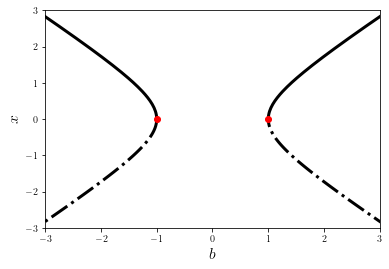

In [14]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
# PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_xlim((-3, 3))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case1.pdf', bbox_inches='tight')
plt.show()

**Case 2**
$$g(a;b)=-a+1$$

In [15]:
xstr = 'b^2+1-a-x**2'
astr = '-a+1'
params = {'b': -2}
ics = {'x': -2, 'a': 1}
DSargs = args(name='EX22')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [16]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': 2, 'a': 1, 'b': -2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

BP Point found 
0 : 
a  =  1.0000000000066158
x  =  1.0133511656783383e-12
b  =  -2.8951471054842763e-11

Eigenvalues = 

     (-0.018252,0.000000)
     (-0.000000,0.000000)
     (-1.000000,0.000000)


branch angle = 0.6674183224882866
Test function #1: 7.993771785445531e-11

Neutral saddle found!

B Point found 
0 : 
a  =  1.0
x  =  -4.000000004435162
b  =  4.000000004435162

B Point found 
0 : 
a  =  1.0
x  =  4.0000000046771715
b  =  -4.0000000046771715



In [17]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': -2, 'a': 1, 'b': -2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
a  =  1.0
x  =  -4.0000000046771715
b  =  -4.0000000046771715

Neutral saddle found!

BP Point found 
0 : 
a  =  1.0000000000104399
x  =  -1.0367629855821153e-12
b  =  4.50165921303278e-11

Eigenvalues = 

     (-0.018673,0.000000)
     (0.000000,0.000000)
     (-1.000000,0.000000)


branch angle = -0.7455220131073261
Test function #1: 7.70384186158572e-11

B Point found 
0 : 
a  =  1.0
x  =  4.000000004435162
b  =  4.000000004435162



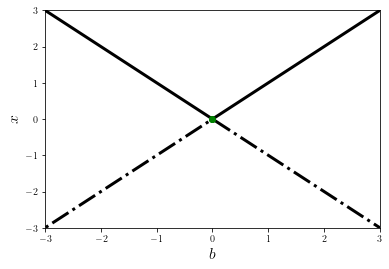

In [18]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-3, 3))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case2.pdf', bbox_inches='tight')
plt.show()

**Case 3**
$$g(a;b)=b-a+1$$

In [19]:
xstr = 'b^2+1-a-x**2'
astr = 'b-a+1'
params = {'b': 2}
ics = {'x': sqrt(2), 'a': 3}
DSargs = args(name='EX23')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-6, 6]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [20]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'a': 3, 'b': 2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.000000000000004
x  =  -6.296665141221475e-08
b  =  1.000000000000004

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!

B Point found 
0 : 
a  =  5.000000004440801
x  =  -3.464101619624575
b  =  4.000000004440801

B Point found 
0 : 
a  =  5.000000005418689
x  =  3.4641016206125967
b  =  4.000000005418689



In [21]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'a': 0, 'b': -1}
PCargs.freepars = ['b']
PCargs.values
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
a  =  -3.0000000036427434
x  =  4.472135958665019
b  =  -4.000000003642744


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  0.999999999999996
x  =  -6.296664619749027e-08
b  =  -3.9264931315987495e-15

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 0.9999999999999999

Neutral saddle found!



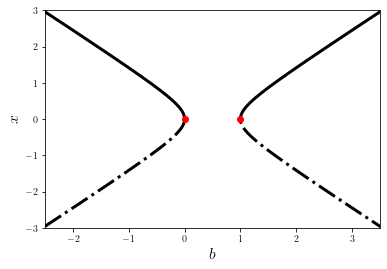

In [22]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2.5, 3.5))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case3.pdf', bbox_inches='tight')
plt.show()

**Case 4**
$$\dot b = g(b;a)=b-a+1$$

In [23]:
xstr = 'b^2+1-a-x**2'
bstr = 'b-a+1'
params = {'a': 3}
ics = {'x': sqrt(2), 'b': 2}
DSargs = args(name='EX24')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'a': [-6, 6]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'b': [-6, 6]}
DSargs.varspecs = {'x': xstr, 'b': bstr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [24]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'b': 2, 'a': 3}
PCargs.freepars = ['a']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
b  =  1.000000000000004
x  =  -6.296665169605316e-08
a  =  2.000000000000004

Eigenvalues = 

     (0.000000,0.000000)
     (1.000000,0.000000)


a = 1.0

B Point found 
0 : 
b  =  5.000000002589937
x  =  4.472135957605653
a  =  6.000000002589937



In [25]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'b': -1, 'a': 0}
PCargs.freepars = ['a']
PCargs.values
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
b  =  -6.000000003734997
x  =  6.480740702153957
a  =  -5.000000003734997

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
b  =  -4.004360670053419e-15
x  =  -6.296664743530164e-08
a  =  0.999999999999996

Eigenvalues = 

     (1.000000,0.000000)
     (0.000000,0.000000)


a = 1.0



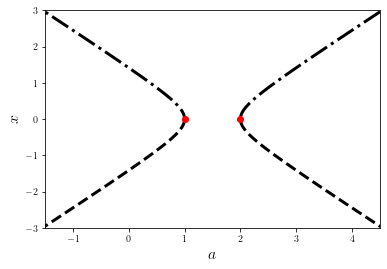

In [26]:
PC['EQ1'].display(('a', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('a', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-1.5, 4.5))
PC.plot.fig1.axes1.axes.set_xlabel('$a$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case4.pdf', bbox_inches='tight')
plt.show()

## $N$-dimensional case

### Example 3
$$x'=\mu-x^2+xy-xy^2$$
$$y'=\lambda-y-x^2+yx^2$$

In [27]:
xstr = 'mu - x**2 + x*y - x*y**2'
ystr = 'lambda -  y - x**2 + y*x**2'
params = {'mu': 0.1, 'lambda':0}
ics = {'x': 0.1, 'y': 0.1}
DSargs = args(name='EX3')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'mu': [-4, 4], 'lambda': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'y': [-1e4, 1e4]}
DSargs.varspecs = {'x': xstr, 'y': ystr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [28]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'x': 0.2750426932248947, 'y': -0.08183951853051877},
 {'x': -1.501107244849535, 'y': 1.7978789438024105})

In [29]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': 0.27504269322489472, 'y': -0.081839518530518768}
PCargs.freepars = ['mu']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 40
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
x  =  -3.1694654093319757e-07
y  =  -1.0045510980952919e-13
mu  =  1.0045507797061951e-13

Eigenvalues = 

     (0.000001,0.000000)
     (-1.000000,0.000000)


a = 0.9999990491609798


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
x  =  -0.38851116373947664
y  =  -0.17777434889873248
mu  =  0.06959520748024722

Eigenvalues = 

     (-0.000000,0.000000)
     (-0.281415,0.000000)


a = 4.437465370995568

B Point found 
0 : 
x  =  -0.8127654848113453
y  =  -1.9462694725930767
mu  =  -4.000000014008771

B Point found 
0 : 
x  =  0.7873817935976702
y  =  -1.6313718230145822
mu  =  4.000000014099429



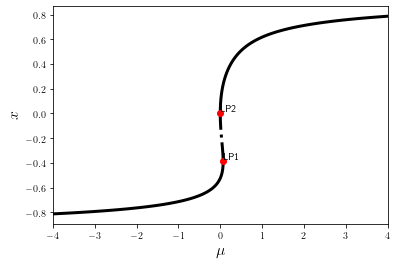

In [30]:
PC['EQ1'].display(('mu', 'x'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-4, 4))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
# plt.savefig(dir + 'Example1Case2.pdf', bbox_inches='tight')
plt.show()

In [31]:
# Two-parameter bifurcation
namefold1 = 'F01'
PCargs = args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP2'
PCargs.freepars = ['lambda', 'mu']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)

PC.curves[namefold1].forward()


Checking...
  |a| = 1.166732


CP Point found 
0 : 
x  =  -0.35595170475404664
y  =  1.377361964034216
lambda  =  1.329549593329878
mu  =  -0.05830927142419663

Eigenvalues = 

     (0.000000,0.000000)
     (-0.681159,0.000000)



Checking...
  <b,c> = -0.000000


BT Point found 
0 : 
x  =  -0.5828500244114845
y  =  1.3691456712069567
lambda  =  1.24374166293363
mu  =  0.045133473443771464

Eigenvalues = 

     (0.000000,0.000006)
     (0.000000,-0.000006)



Checking...
  |a| = 0.294512


CP Point found 
0 : 
x  =  -1.0524526578453595
y  =  0.6725206361596341
lambda  =  1.0352553139006653
mu  =  1.3394452237084382

Eigenvalues = 

     (2.432799,0.000000)
     (0.000000,0.000000)


Maximum test function iterations reached.


Checking...
  |a| = 0.220913


CP Point found 
0 : 
x  =  -1.0322497057376026
y  =  0.5856147313500797
lambda  =  1.0271585846654245
mu  =  1.3160356126608015

Eigenvalues = 

     (2.372709,0.000000)
     (0.000000,0.000000)



Checking...
  <b,c> = 0.000000


B

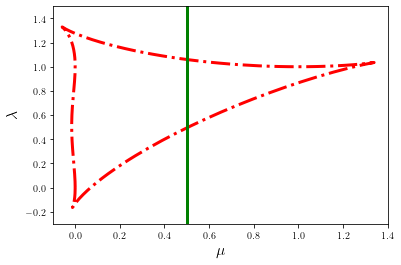

In [32]:
PC[namefold1].display(('mu', 'lambda'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','BT','CP'])
PC.plot.fig1.axes1.axes.set_xlim((-0.1, 1.4))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-0.3, 1.5))
PC.plot.fig1.axes1.axes.set_ylabel('$\lambda$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.axvline(x=0.5, lw=3, color='g')
plt.savefig(dir + 'Example3TwoParBif.pdf', bbox_inches='tight')
plt.show()

**Extended system**

In [33]:
xstr = 'mu - x**2 + x*y - x*y**2'
ystr = 'lambda -  y - x**2 + y*x**2'
mustr = 'mu - 0.5'
params = {'lambda':0.5}
ics = {'x': 0.1, 'y': 0.1, 'mu': 0.6}
DSargs = args(name='EX32')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'lambda': [0, 1.5]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'y': [-1e4, 1e4], 'mu': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'y': ystr, 'mu': mustr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [34]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'mu': 0.5, 'x': -0.6542548769595159, 'y': 0.12579855937382364},
 {'mu': 0.5, 'x': 0.7071067811864734, 'y': 5.700069623830717e-14},
 {'mu': 0.5, 'x': -0.7071067811865472, 'y': 4.959056251226101e-16},
 {'mu': 0.5, 'x': -1.3496175169788096, 'y': 1.6086668495344683})

In [35]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': -0.70710678118647341, 'y': 0.0, 'mu': 0.5}
PCargs.freepars = ['lambda']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 40
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
mu  =  0.5
x  =  -1.1559964153209779
y  =  -0.4866453884377868
lambda  =  1.5000000423979203


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000002

LP Point found 
0 : 
mu  =  0.5
x  =  -0.6792841410376251
y  =  0.06043755995754463
lambda  =  0.49397698561271264

Eigenvalues = 

     (-0.000001,0.000000)
     (0.876781,0.000000)
     (1.000000,0.000000)


a = 2.271212676007278

Maximum test function iterations reached.


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
mu  =  0.5
x  =  -0.842918545657597
y  =  1.2069239139334165
lambda  =  1.059902057327001

Eigenvalues = 

     (0.000000,0.000000)
     (1.146607,0.000000)
     (1.000000,0.000000)


a = 1.7965472537703273

B Point found 
0 : 
mu  =  0.5
x  =  -1.5488063237625798
y  =  1.714897964178306
lambda  =  -7.584442628975375e-09



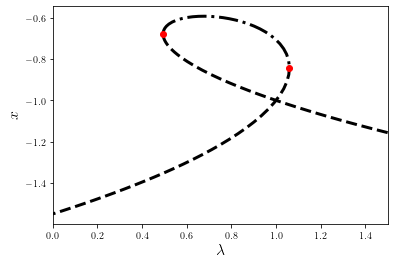

In [36]:
PC['EQ1'].display(('lambda', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((0, 1.5))
PC.plot.fig1.axes1.axes.set_xlabel('$\lambda$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example3ExtSysBifX.pdf', bbox_inches='tight')
plt.show()

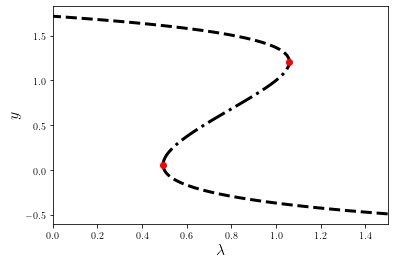

In [37]:
PC['EQ1'].display(('lambda', 'y'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((0, 1.5))
PC.plot.fig1.axes1.axes.set_xlabel('$\lambda$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example3ExtSysBifY.pdf', bbox_inches='tight')
plt.show()